In [10]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm, datasets
import sklearn
import sklearn.inspection
from matplotlib.lines import Line2D
import scipy

In [11]:
# Create dataset
X = np.array([
    [0.715, -0.28728070175438597],
    [1.425, -1.8712406015037595],
    [1.065, -1.7709899749373434],
    [0.595, -1.6506892230576442],
    [0.465, -1.4000626566416041],
    [0.785, -1.3900375939849625],
    [0.815, -1.630639097744361],
    [0.805, -1.8211152882205515],
    [0.365, -1.7609649122807018],
    [0.195, -1.2296365914786966],
    [0.455, -1.2095864661654134],
    [0.685, -1.1795112781954886],
    [0.755, -0.7584586466165414],
    [0.255, -0.28728070175438597],
    [0.515, -0.1168546365914787],
    [0.325, -0.5780075187969925],
    [0.335, -0.9689849624060151],
    [0.765, -0.5579573934837093],
    [0.915, -0.5379072681704261],
    [0.945, -0.6481829573934837],
    [0.865, -0.17700501253132833],
    [1.245, -1.119360902255639],
    [1.355, -1.1995614035087718],
    [1.585, -1.4501879699248121],
    [1.775, -1.6907894736842106],
    [1.595, -1.7609649122807018],
    [1.365, -1.6406641604010026],
    [1.325, -0.9288847117794486],
    [1.475, -0.6381578947368421],
    [1.715, -0.3674812030075188],
    [2.225, -0.6080827067669173],
    [1.875, -0.8787593984962406],
    [1.605, -1.1093358395989974],
    [2.015, -1.269736842105263],
    [2.355, -1.0491854636591478],
    [2.125, -0.49780701754385964],
    [1.775, -0.1068295739348371],
    [1.265, -0.16697994987468673],
    [0.945, -0.16697994987468673],
    [1.285, -0.45770676691729323],
    [2.145, -1.6206140350877194],
    [2.145, -0.9990601503759399]]
)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Number of instances: 42


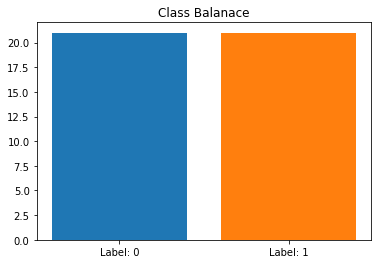

In [12]:
# Descriptive analysis of dataset
print(f"Number of instances: {len(X)}")

labels = np.unique(y)

plt.title("Class Balanace")
for label in labels:
    plt.bar(f"Label: {label}", np.sum(y == label))

plt.show()

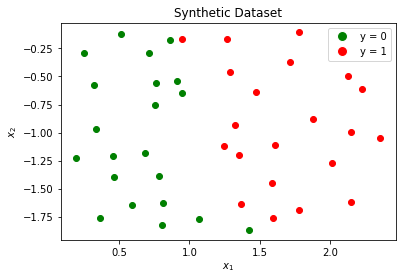

In [13]:
# Plot points
plt.title("Synthetic Dataset")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color="green" if y[i] == 0 else "red", label="y=0" if y[i] == 0 else "y=1")

legend_elements = [Line2D([0], [0], marker='o', color='w', label='y = 0',
                          markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='y = 1',
                          markerfacecolor='r', markersize=10)
                  ]
plt.legend(handles=legend_elements)
plt.show()
# plt.savefig("dataset_plot.svg")

In [14]:
# Fit a two-class SVM on all points
model = svm.SVC(kernel="poly", degree=5, gamma="auto", C=1.0)
model.fit(X, y)

SVC(degree=5, gamma='auto', kernel='poly')

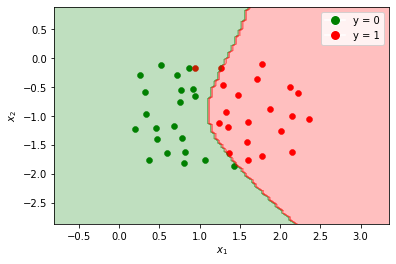

In [15]:
# Plot decision boundary
fig, ax = plt.subplots()

for i in range(len(X)):
    ax.scatter(X[i, 0], X[i, 1], color="green" if y[i] == 0 else "red", label="y=0" if y[i] == 0 else "y=1", linewidths=0.5)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='y = 0', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='y = 1', markerfacecolor='r', markersize=10)]
plt.legend(handles=legend_elements)

sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap=matplotlib.colors.ListedColormap(["green", "red"]),
        alpha=0.25,
        ax=ax,
        xlabel="$x_1$",
        ylabel="$x_2$",
)
# plt.savefig("decision_boundary.svg")

In [16]:
# Test SVM predictions
sample = np.array([[0.3, -1]])

print(f"Decision value: {model.decision_function(sample)}")
print(f"Prediction: {model.predict(sample)}")

Decision value: [-1.36603032]
Prediction: [0]


In [17]:
# Implement Wachter et al. algorithm
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def manhatten(a, b):
    return np.abs(a - b).sum()


def wachter(x, counterfactual_outcome, d, start_value, eps):
    lam = 1
    counterfactual = start_value
    
    loss = lambda z: lam * (model.decision_function(np.array([z]))[0] - counterfactual_outcome) ** 2 + d(z, x)
    
    while np.abs(model.decision_function(np.array([counterfactual]))[0] - counterfactual_outcome) > eps:
        lam += 1
        counterfactual = scipy.optimize.minimize(loss, counterfactual).x
    
    return lam, counterfactual

In [18]:
# Run the algorithm
x = np.array([0.6, -1])
counterfactual_outcome = 1

lam, counterfactual = wachter(x, counterfactual_outcome=counterfactual_outcome, d=manhatten, start_value=np.array([0, 0]), eps=0.01)
print(f"Lambda: {lam}")
print(f"Counterfactual: {counterfactual}")

# Formulate explanation
print(f"Currently, your input x={x} is classified as {model.predict(np.array([x]))[0]}.") 
print(f"To change the prediction to {counterfactual_outcome}, you have to add {counterfactual[0] - x[0]:.4f} on the first feature and {counterfactual[1] - x[1]:.4f} on the second feature.")

Lambda: 8
Counterfactual: [ 1.25290296 -1.        ]
Currently, your input x=[ 0.6 -1. ] is classified as 0.
To change the prediction to 1, you have to add 0.6529 on the first feature and -0.0000 on the second feature.


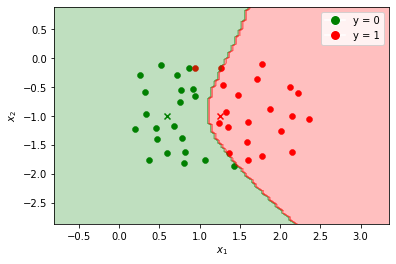

In [19]:
# Plot the counterfactual
fig, ax = plt.subplots()

for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color="green" if y[i] == 0 else "red", label="y=0" if y[i] == 0 else "y=1", linewidths=0.5)

    
plt.scatter(x[0], x[1], color="green", marker="x")
plt.scatter(counterfactual[0], counterfactual[1], color="red", marker="x")

legend_elements = [Line2D([0], [0], marker='o', color='w', label='y = 0', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='y = 1', markerfacecolor='r', markersize=10)]
plt.legend(handles=legend_elements)

sklearn.inspection.DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap=matplotlib.colors.ListedColormap(["green", "red"]),
        alpha=0.25,
        ax=ax,
        xlabel="$x_1$",
        ylabel="$x_2$",
    )

# plt.savefig("cf.svg")